<a href="https://www.kaggle.com/code/samaasabry/boston-house-prediction?scriptVersionId=146136961" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Import Libraries & Reading Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data= pd.read_csv('/kaggle/input/boston-house-prices/housing.csv',header=None, delimiter=r'\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Features**
1. CRIM: per capita crime rate by town

2. ZN: This feature represents the proportion of residential land zoned for lots over 25,000 sq.ft. It indicates the amount of land in each town that is designated for large residential lots.

3. INDUS: INDUS represents the proportion of non-retail business acres per town. It indicates the amount of land devoted to non-retail businesses, such as manufacturing or industrial activities, in each town.

4. CHAS: CHAS is a dummy variable that represents whether a town borders the Charles River or not. It takes a value of 1 if the town does border the river, and 0 otherwise.

5. NOX: NOX represents the concentration of nitric oxides (air pollution) in parts per 10 million. It measures the level of air pollution in each town.

6. RM: RM stands for average number of rooms per dwelling. It represents the average number of rooms in houses or apartments in each town.

7. AGE: AGE represents the proportion of owner-occupied units that were built prior to 1940. It indicates the age of the housing stock in each town, with higher values indicating a higher proportion of older homes.

8. DIS: DIS stands for weighted distances to five Boston employment centers. It represents the average distance from each town to five major employment centers in Boston, with lower values indicating closer proximity.

9. RAD: RAD is an index of accessibility to radial highways. It measures the accessibility of each town to radial highways, with higher values indicating better accessibility.

10. TAX: TAX represents the full-value property-tax rate per $10,000. It indicates the property tax rate for each town, with higher values indicating higher tax rates.

11. PTRATIO: PTRATIO represents the pupil-teacher ratio by town. It reflects the average number of students per teacher in the town's public schools.

12. B: Bk is the proportion of blacks by town 

13. LSTAT: percent lower status of the population

14. **(TARGET)** MEDV: MEDV represents the median value of owner-occupied homes in $1000s. It indicates the median price of homes in each town, which is a commonly used measure of housing market values.


In [3]:
#Naming Columns 
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data= pd.read_csv('/kaggle/input/boston-house-prices/housing.csv',header=None, delimiter=r'\s+', names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# **Data Preprocessing**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.shape

(506, 14)

In [6]:
#Checking Null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#Checking duplicates
data.duplicated().sum()

0

In [8]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

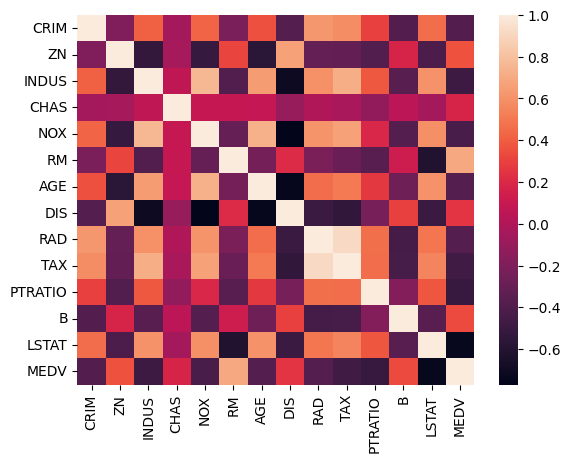

In [9]:
#Feature Selection checking the correlation
sns.heatmap(data.corr())

<Axes: xlabel='CHAS', ylabel='MEDV'>

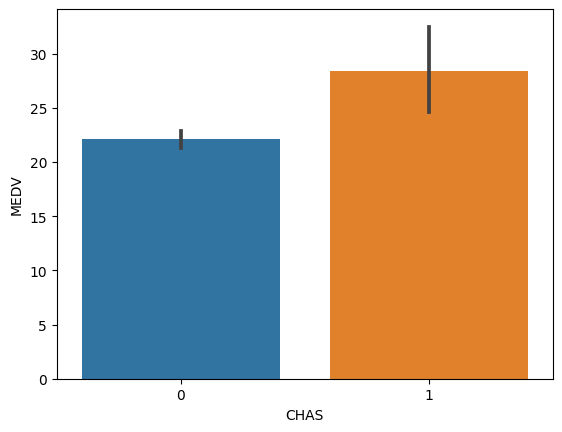

In [10]:
sns.barplot(x='CHAS',y='MEDV',data=data)

Thought the correlation between CHAS and MEDV is weak but it is shown that high MEDV in the towns whose borders near the Charles River
thus MEDV is affected by CHAS feature

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
#Splitting Dataset into features and target 
X = data.drop('MEDV',axis=1)
y = data['MEDV']

In [13]:
#Normailizng Data

ss = StandardScaler()
X = ss.fit_transform(X)

In [14]:
#Splitting into training and testing sets after pefroming same preprocessing on both

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [15]:
#Checking shape 
X_train.shape, X_test.shape

((354, 13), (152, 13))

# **ML Algorithims**
[Regression_Techniques](http://www.geeksforgeeks.org/types-of-regression-techniques/)

## **Grid Search**

Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

def grid_search(estimator, id, param_grid):
    grid = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring={'mse': 'neg_mean_squared_error', 'accuracy': 'accuracy'},
        refit='accuracy',  # Use accuracy to select the best model
        cv=5
    )

    grid.fit(X_train, y_train)

    print(f"{id}  BEST ESTIMATOR: {grid.best_estimator_}")
    print(f"{id}  BEST PARAMETERS: {grid.best_params_}")
    print(f"{id}  BEST SCORE (MSE): {grid.best_score_}")
    
    # Prediction on test set 
    y_pred = grid.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    
    print(f"{id}  MSE: {mse}")

## **Linear Regression**

In [17]:
#Import Library for Linear Regression
from sklearn.linear_model import LinearRegression

#Create a Linear regressor
LR_model=LinearRegression()

# Define the hyperparameters grid you want to search
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}


grid_search(LR_model, "Linear Regression", param_grid)

Linear Regression  BEST ESTIMATOR: LinearRegression(positive=True)
Linear Regression  BEST PARAMETERS: {'fit_intercept': True, 'positive': True}
Linear Regression  BEST SCORE (MSE): nan
Linear Regression  MSE: 29.46258107520468


## **XGBoost** 

In [18]:
#Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xgb_model =XGBRegressor()

# Define the parameter grid
param_grid = {
"n_estimators": [200, 900], 
"max_depth": [5, 10]
}

grid_search(xgb_model, "XGBoost", param_grid)

XGBoost  BEST ESTIMATOR: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
XGBoost  BEST PARAMETERS: {'max_depth': 5, 'n_estimators': 200}
XGBoost  BEST SCORE (MSE): nan
XGBoost  MSE: 10.053800460368846


## **Random Forest**

In [19]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg_model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

grid_search(reg_model, "Random Forest", param_grid)

Random Forest  BEST ESTIMATOR: RandomForestRegressor()
Random Forest  BEST PARAMETERS: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest  BEST SCORE (MSE): nan
Random Forest  MSE: 8.113710881578951


## **SVM** 

In [20]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
svm_model = svm.SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}
grid_search(svm_model, "SVM", param_grid)

SVM  BEST ESTIMATOR: SVR(C=0.1, kernel='linear')
SVM  BEST PARAMETERS: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM  BEST SCORE (MSE): nan
SVM  MSE: 23.108213961642026


# **Neural Network**

## **Building Model Architecture** 

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    # input hidden layer
    tf.keras.layers.Dense(units=13,activation='relu',input_shape=(13,)),
    tf.keras.layers.Dense(units=10,activation="relu"),
    # Output layer
    tf.keras.layers.Dense(units=1,activation='linear')
])

In [22]:
#compile
model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=['mse'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 10)                140       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


## **Model Training** 

In [24]:
#Prevent Overfitting
# Creating a procedure to decide the no. of epochs to train the model (EarlyStopping)

from tensorflow.keras.callbacks import EarlyStopping

# create object for EarlyStopping class
cb = EarlyStopping(
    monitor = 'val_loss',   # testing error
    min_delta = 0.00001,    # min value of delta
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [25]:
# Train our model, fit()

history = model.fit(X_train,y_train,validation_split=0.2,epochs=100, callbacks=cb)

Epoch 1/100
9/9 [==============================] - 5s 25ms/step - loss: 420.6643 - mse: 420.6643 - val_loss: 86.4054 - val_mse: 86.4054
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 420.2905 - mse: 420.2905 - val_loss: 353.6931 - val_mse: 353.6931
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 365.6232 - mse: 365.6232 - val_loss: 261.7886 - val_mse: 261.7886
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 279.1661 - mse: 279.1661 - val_loss: 198.9961 - val_mse: 198.9961
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 218.9630 - mse: 218.9630 - val_loss: 156.6463 - val_mse: 156.6463
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 177.3033 - mse: 177.3033 - val_loss: 128.0941 - val_mse: 128.0941
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 148.4291 - mse: 148.4291 - val_loss: 109.0136 - val_mse: 109.0136
Epoch 8/100
9/9 [=========================

In [26]:
mse,mae = model.evaluate(X_test,y_test)
print(f"Our mean squared error is : {mse}")

5/5 [==============================] - 0s 3ms/step - loss: 91.8287 - mse: 91.8287
Our mean squared error is : 91.8287124633789


# **Best Result**

The best regression model achieving the lowest mse from all the of the previous was **Random forest model** 
